In [1]:
from geneformer import EmbExtractor
from geneformer.emb_extractor import EMB_device
from geneformer.tokenizer import TOKEN_DICTIONARY_FILE

print("in_silico_perturber.py:\t{}".format(EMB_device))
print("tonenizer.py:\t\t{}".format(TOKEN_DICTIONARY_FILE))


in_silico_perturber.py:	cuda:0
tonenizer.py:		/home/pj25000162/ku50001814/pkl_data/MLM-re_token_dictionary_v1.pkl


In [2]:
from datasets import load_from_disk
import numpy as np

dataset_name = "/home/pj25000162/ku50001814/scRNA-seq_data/Adrenal_scRNA-seq/all/"
dataset = load_from_disk(dataset_name)
print(dataset)


disease_types = np.unique(dataset["disease"])
print(disease_types)
print(disease_types.shape[0])

Dataset({
    features: ['cell_types', 'disease', 'input_ids', 'length', 'organ_major'],
    num_rows: 18373
})
['FD' 'FO' 'FOD' 'FS' 'MC' 'MCD' 'MS']
7


In [3]:
# initiate EmbExtractor
#"model_type": {"Pretrained","GeneClassifier","CellClassifier"}

use_model_type = "CellClassifier"

embex = EmbExtractor(model_type=use_model_type,
                     num_classes=disease_types.shape[0],
                     filter_data=None,
                     max_ncells=1000,
                     emb_layer=0,
                     emb_label=["disease"],
                     labels_to_plot=["disease"],
                     forward_batch_size=200,
                     nproc=16)


FINETUNED_MODEL_DIR = "/home/pj25000162/ku50001814/results/251017_mouse-geneformer_CellClassifier_nan_L2048_B12_LR5e-05_LSlinear_WU500_E20_OadamW_F0_ISP-nan/checkpoint-24500/"

import os
DIR_NAME = "/home/pj25000162/ku50001814/results/UMAP/7groups/"
if not os.path.exists(DIR_NAME):
    os.mkdir(DIR_NAME)


# extracts embedding from input data
# example dataset: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/cell_classification/disease_classification/human_dcm_hcm_nf.dataset


embs = embex.extract_embs(FINETUNED_MODEL_DIR,
                          dataset_name,
                          DIR_NAME,
                          "cell_embed_{}".format(use_model_type)
                         )



  0%|          | 0/92 [00:00<?, ?it/s]

In [4]:
dataset_name = "7groups"

embex.plot_embs(
    embs=embs, 
    plot_style="umap",
    output_directory=DIR_NAME,  
    output_prefix=f"emb_plot_{dataset_name}",
)


/home/pj25000162/ku50001814/src/Mouse-Geneformer/geneformer/emb_extractor.py:202: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors=row[0]
/home/pj25000162/ku50001814/.local/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/pj25000162/ku50001814/.local/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2250x2250 with 0 Axes>

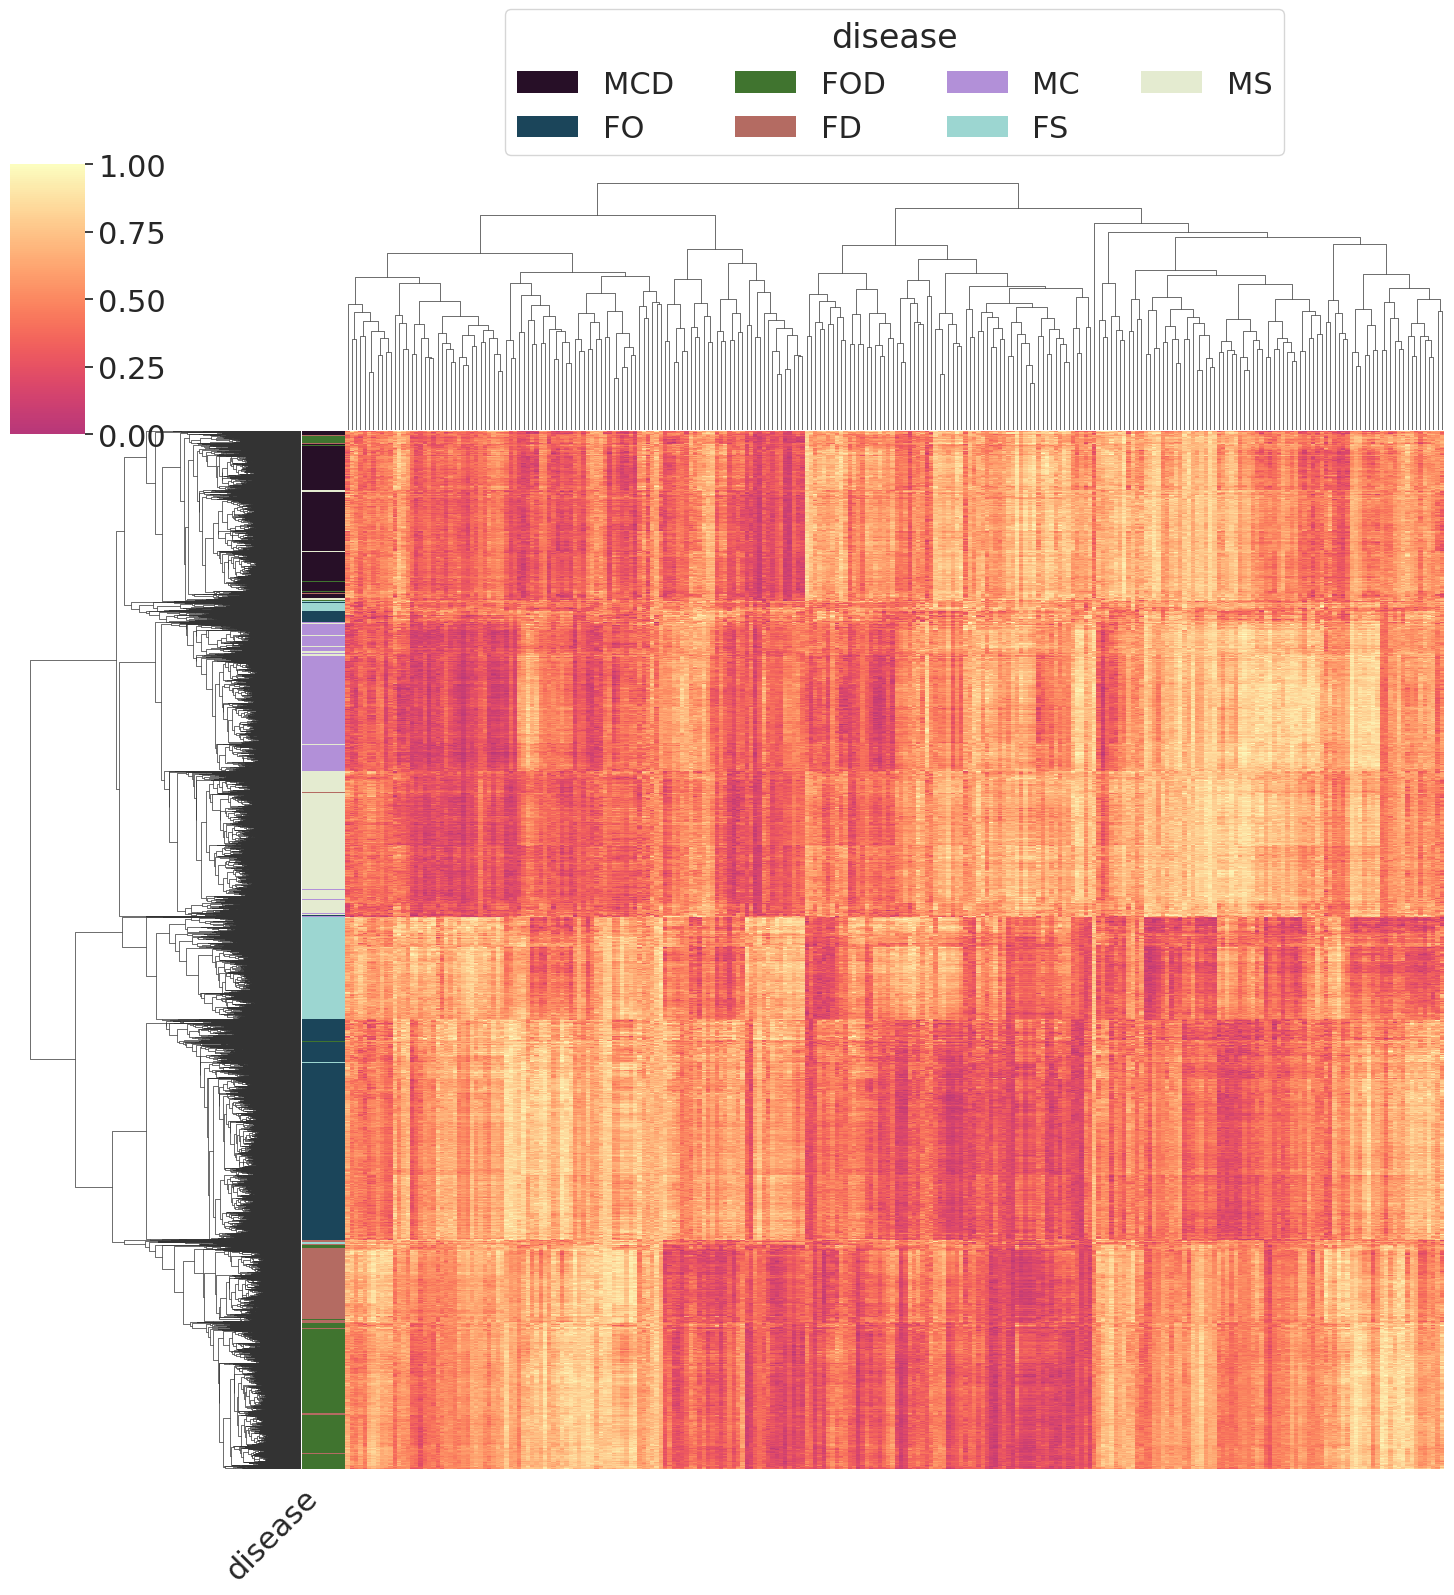

In [5]:
# plot heatmap of cell embeddings
embex.plot_embs(embs=embs, 
                plot_style="heatmap",
                output_directory="/home/pj25000162/ku50001814/results/Heatmap",
                output_prefix="heatmap_emb_plot_{}".format(dataset_name)
               )